# Here I will visualize my results by loading csv files from home/resuls

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%cd
%cd results

/home/samuel
/home/samuel/results


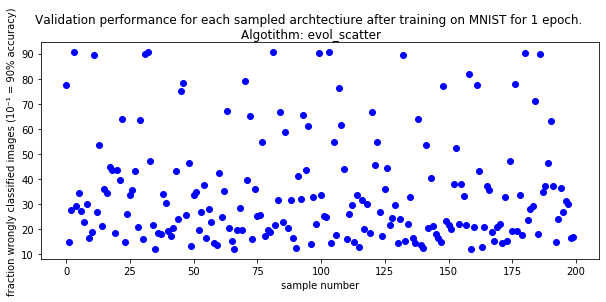

best archtecture from RS:  epochs                20
block         bottleneck
group_size            32
n_filters             64
filter_upd             1
n_blocks1              0
n_blocks2              3
n_blocks3              5
n_blocks4              7
conv0                  3
pool                  no
reduce               yes
Value              11.74
Timestamp      222137402
Name: 35, dtype: object


In [5]:
# I have to make a nice way to sort the data since the randomly generated points are in reversed order in
def make_scatter(data, color, name):
    scores = np.zeros((len(data),2))

    best = (-1, 100)
    for i in range(len(data)):
        value = data['Value'].iloc[i]
        if value < best[1]:
            best = (i, value)
        scores[i, :] = [i, value]  # RS is saved  in reversed order
        
    

    # view data. I plot in logscale to easier see differnce between good samples
    plt.figure(figsize=(10,4))
    plt.scatter(scores[:,0], scores[:,1], color = color)
    #plt.yscale('log')
    
    plt.suptitle('Validation performance for each sampled archtectiure after training on MNIST for 1 epoch. \nAlgotithm: '+ name)
    plt.xlabel('sample number')
    plt.ylabel('fraction wrongly classified images (10⁻¹ = 90% accuracy)')
    #plt.savefig(name)

    plt.show()

    return best

#legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C0')

data = pd.read_csv('resnextRS200.csv')     
bestRS = make_scatter(data, 'blue', 'evol_scatter')

best_arch_RS = data.iloc[bestRS[0]]

print('best archtecture from RS: ', best_arch_RS)

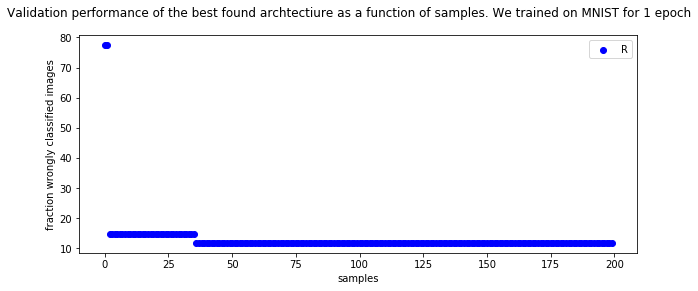

In [6]:
#data = pd.read_csv ('mnist_BO_10+40.csv')   

scores = np.zeros((len(data),2))
scores[0, :] = [0, data['Value'].iloc[0]]

for i in range(1, len(data)):
    scores[i, :] = [i, min(data['Value'].iloc[0:i])] # data is stored reversed
    

# view data. I plot in logscale to easier see differnce between good samples
plt.figure(figsize=(10,4))

plt.scatter(scores[:,0], scores[:,1], color = "blue")
#plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
plt.suptitle('Validation performance of the best found archtectiure as a function of samples. We trained on MNIST for 1 epoch')
plt.xlabel('samples')
plt.ylabel('fraction wrongly classified images')
#plt.title('Regression Analysis')
#plt.text(1.0, 0, 'Loss = %.4f' % loss,
            #fontdict={'size': 24, 'color':  'red'})
#plt.yscale('log')
plt.legend(('Random Search'))
#plt.savefig('evol_running_best')

plt.show()

In [7]:
%ls

evol_running_best.png  mnist_RS_100.csv     resnextRS200.csv
evol_scatter.png       resnextNRE20_80.csv  RS100_running_best.png
evolution_output.png   resnextRS100.csv     RS100_scatter.png


In [8]:
type(best_arch_RS)

pandas.core.series.Series

In [9]:
best_arch_RS.array


<PandasArray>
[                20,       'bottleneck',                 32,
                 64,                  1,                  0,
                  3,                  5,                  7,
                  3,               'no',              'yes',
 11.739999999999995,          222137402]
Length: 14, dtype: object

In [10]:
best_arch_RS.reduce

'yes'

In [16]:
best = (-1, 100)
for i in range(len(data)):
    value = data['Value'].iloc[i]
    if value < best[1] and i != 35:
        best = (i, value)
best    

(66, 11.78)

In [17]:
data.iloc[best[0]]

epochs               20
block             basic
group_size           32
n_filters            16
filter_upd            2
n_blocks1            11
n_blocks2             5
n_blocks3             1
n_blocks4             3
conv0                 3
pool                 no
reduce              yes
Value             11.78
Timestamp     178193016
Name: 66, dtype: object